<a href="https://colab.research.google.com/github/Gulayrose/DAwPy/blob/main/pandas_part2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
drinks = pd.read_csv("http://bit.ly/drinksbycountry")

In [ ]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [ ]:
drinks.beer_servings.mean() # sadece beer ile ilgili ortalama 
#drinks["beer_serving"].mean() ayni sonuc cikar

106.16062176165804

In [ ]:
drinks.groupby("continent").beer_servings.mean() # hangi degiskene gore gruplayacagiz
#drinks.groupby("continent")["beer_serving"].mean

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [ ]:
drinks.groupby(["Africa"]).beer_servings.mean() #sadece africa nin ortalamasi

In [ ]:
drinks[drinks['continent']=='Africa'].beer_servings.mean() #continenetlerin icnde sadece africa olani getir

61.471698113207545

In [ ]:
drinks[drinks['continent']=='Africa'].groupby("country").beer_servings.mean() # 

country
Algeria                      25
Angola                      217
Benin                        34
Botswana                    173
Burkina Faso                 25
Burundi                      88
Cabo Verde                  144
Cameroon                    147
Central African Republic     17
Chad                         15
Comoros                       1
Congo                        76
Cote d'Ivoire                37
DR Congo                     32
Djibouti                     15
Egypt                         6
Equatorial Guinea            92
Eritrea                      18
Ethiopia                     20
Gabon                       347
Gambia                        8
Ghana                        31
Guinea                        9
Guinea-Bissau                28
Kenya                        58
Lesotho                      82
Liberia                      19
Libya                         0
Madagascar                   26
Malawi                        8
Mali                          5


In [ ]:
drinks.groupby("continent").beer_servings.agg(['count','min','max','mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [ ]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


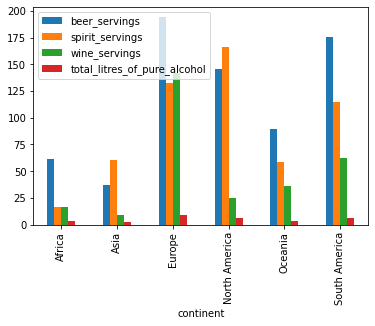

In [ ]:
%matplotlib inline
drinks.groupby('continent').mean().plot(kind='bar')


In [ ]:
import numpy as np

In [ ]:
rng = np.random.RandomState(0)
df = pd.DataFrame({"key":["A","B","C","A","B","C"],"data1":range(6),"data2":rng.randint(0,10,6)},columns=['key','data1','data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [ ]:
#df.groupby('key').data1.median()
df.groupby('key')["data1"].median()

key
A    1.5
B    2.5
C    3.5
Name: data1, dtype: float64

In [ ]:
#df.groupby('key')["data1"].agg(["mean","max","min","median"])
df.groupby('key')["data1"].aggregate(["mean","max","min","median"])

,mean,max,min,median
key,,,,
A,1.5,3,0,1.5
B,2.5,4,1,2.5
C,3.5,5,2,3.5


In [ ]:
df.groupby('key').aggregate({"data1":"max","data2":"min"})

,data1,data2
key,,
A,3,3
B,4,0
C,5,3


FILTERING

In [ ]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [ ]:
df.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [ ]:
def filter_func(x):
  return x['data2'].std()>4


In [ ]:
df.groupby('key').filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


In [ ]:
df1 = df.groupby('key').std()
df1

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [ ]:
df1[df1['data2']>4]

,data1,data2
key,,
B,2.12132,4.949747
C,2.12132,4.242641


TRANSFORMATION

In [ ]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [ ]:
df.groupby('key').transform(lambda x : x-x.mean())

#mean
#data1:A:1.5 B:2.5 C:3.5
#data2:A:4 B:3.5 C:6

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


APPLY

In [ ]:
#normalize data1
def norm_by_data2(x):
  #x['data1'] =['data1']/x['data2'].sum()
  x['data1'] /=x['data2'].sum()
  return x

In [ ]:
df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


SPLITTING and GROUPING

In [ ]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [ ]:
L=[0,1,0,1,2,0]
df.groupby(L).sum()
#L içinde sıfırların indeklerine git ve verileri topla, sonra birleri sonra ikileri

,data1,data2
0,7,17
1,4,3
2,4,7


In [ ]:
df2 = df.set_index('key')
df2

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9


In [ ]:
df2.groupby(str.lower).mean()

,data1,data2
a,1.5,4.0
b,2.5,3.5
c,3.5,6.0


In [ ]:
data = pd.DataFrame([('bird', 389.0),
                     ('bird', 40.0), ('bird', 405.0),
                     ('mammal', 80.2),
                     ('mammal', 12.0),('mammal', 58)],
                     index=['falcon', 'parrot', 'eagle', 'lion', 'monkey', 'leopard'],
                    columns=('class', 'speed'))
data

,class,speed
falcon,bird,389.0
parrot,bird,40.0
eagle,bird,405.0
lion,mammal,80.2
monkey,mammal,12.0
leopard,mammal,58.0


In [ ]:
data.groupby('class').max()

,speed
class,
bird,405.0
mammal,80.2


In [ ]:
data.groupby('class').mean()

,speed
class,
bird,278.000000
mammal,50.066667


PIVOT TABLE

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/pandas/10_pivot/weather.csv")
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


In [ ]:
df.pivot(index="date",columns="city")

temperature                 humidity                
city         beijing mumbai new york  beijing mumbai new york
date                                                         
5/1/2017          80     75       65       26     80       56
5/2/2017          77     78       66       30     83       58
5/3/2017          79     82       68       35     85       60

In [ ]:
df.pivot(index="date",columns="city",values='humidity')

city,beijing,mumbai,new york
date,,,
5/1/2017,26,80,56
5/2/2017,30,83,58
5/3/2017,35,85,60


In [ ]:
df.pivot(index="humidity",columns="city")

date                     temperature                
city       beijing    mumbai  new york     beijing mumbai new york
humidity                                                          
26        5/1/2017       NaN       NaN        80.0    NaN      NaN
30        5/2/2017       NaN       NaN        77.0    NaN      NaN
35        5/3/2017       NaN       NaN        79.0    NaN      NaN
56             NaN       NaN  5/1/2017         NaN    NaN     65.0
58             NaN       NaN  5/2/2017         NaN    NaN     66.0
60             NaN       NaN  5/3/2017         NaN    NaN     68.0
80             NaN  5/1/2017       NaN         NaN   75.0      NaN
83             NaN  5/2/2017       NaN         NaN   78.0      NaN
85             NaN  5/3/2017       NaN         NaN   82.0      NaN

In [ ]:
#pivot table is used to summarize and aggregate data inside dataframe


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/pandas/10_pivot/weather2.csv")
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/1/2017,new york,61,54
2,5/2/2017,new york,70,60
3,5/2/2017,new york,72,62
4,5/1/2017,mumbai,75,80
5,5/1/2017,mumbai,78,83
6,5/2/2017,mumbai,82,85
7,5/2/2017,mumbai,80,26


In [ ]:
df = df.pivot_table(index='city',columns='date',margins=True)
df

humidity                 temperature                 
date     5/1/2017 5/2/2017    All    5/1/2017 5/2/2017     All
city                                                          
mumbai      81.50    55.50  68.50       76.50     81.0  78.750
new york    55.00    61.00  58.00       63.00     71.0  67.000
All         68.25    58.25  63.25       69.75     76.0  72.875

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/pandas/10_pivot/weather3.csv")
df['date'] = pd.to_datetime(df['date'])
#type(df['date'][0])
df



,date,city,temperature,humidity
0,2017-05-01,new york,65,56
1,2017-05-02,new york,61,54
2,2017-05-03,new york,70,60
3,2017-12-01,new york,30,50
4,2017-12-02,new york,28,52
5,2017-12-03,new york,25,51


In [ ]:
df.pivot_table(index=pd.Grouper(freq="M",key="date"),columns="city")

,humidity,temperature
city,new york,new york
date,,
2017-05-31,56.666667,65.333333
2017-12-31,51.000000,27.666667


In [ ]:
train = pd.read_csv("http://bit.ly/kaggletrain")

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train["Sex_num"] = train.Sex.map({"female":0,"male":1})
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [ ]:
train.loc[0:4,["Sex","Sex_num"]]

,Sex,Sex_num
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


In [ ]:
train['Name_Lenght'] = train.Name.apply(len)

In [ ]:
train.loc[0:4,["Name","Name_Lenght"]]

,Name,Name_Lenght
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
4,"Allen, Mr. William Henry",24


In [ ]:
import numpy as np
df.head()


,date,city,temperature,humidity
0,2017-05-01,new york,65,56
1,2017-05-02,new york,61,54
2,2017-05-03,new york,70,60
3,2017-12-01,new york,30,50
4,2017-12-02,new york,28,52


In [ ]:
train["Fare_ceil"]= train['Fare'].apply(np.ceil)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Name_Lenght,Fare_ceil
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,23,8.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,51,72.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,22,8.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,44,54.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,24,9.0


In [ ]:
train.Name.str.split(',')

TypeError: ignored

In [ ]:
def get_element(my_list,position):
  return my_list[0]
train["Surname"]= train.Name.str.split(",").apply(get_element,position=0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Name_Lenght,Fare_ceil,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,23,8.0,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,51,72.0,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,22,8.0,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,44,54.0,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,24,9.0,Allen


In [ ]:
train["Surname"]= train.Name.str.split(",").apply(lambda x: x[0])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Name_Lenght,Fare_ceil,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,23,8.0,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,51,72.0,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,22,8.0,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,44,54.0,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,24,9.0,Allen


In [ ]:
drinks = pd.read_csv("http://bit.ly/drinksbycountry")
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [ ]:
drinks.loc[:,"beer_servings":"wine_servings"].apply(np.argmax,axis=1)

0      0
1      1
2      0
3      2
4      0
      ..
188    0
189    0
190    0
191    0
192    0
Length: 193, dtype: int64

In [ ]:
drinks.loc[:,"beer_servings":"wine_servings"].applymap(float)

,beer_servings,spirit_servings,wine_servings
0,0.0,0.0,0.0
1,89.0,132.0,54.0
2,25.0,0.0,14.0
3,245.0,138.0,312.0
4,217.0,57.0,45.0
...,...,...,...
188,333.0,100.0,3.0
189,111.0,2.0,1.0
190,6.0,0.0,0.0
191,32.0,19.0,4.0


In [ ]:
drinks.loc[:,"beer_servings":"wine_servings"].apply(np.argmax,axis=1)